In [1]:
import numpy as np
from astropy.units import Unit, Quantity
from convert import FILE_CDF

In [2]:
# Run the conversion script if the CDF file is not present.
if not FILE_CDF.exists():
    from convert import write_cdf
    write_cdf()

In [3]:
from convert import load_data
data = load_data("cdf")

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
plot_config = {
    'akrd': ("AKR (Earth) day-side", '--r'),
    'akrn': ("AKR (Earth) night-side", 'r'),
    'jup': ("Jupiter Average", '-k'),
    'jupmax': ("Jupiter Peak", '--k'),
    'nkom': (None, '-k'),
    'nkommax': (None, '--k'),
    'sat': ("SKR (Saturn)", '-g'),
    'ukr': ("UKR (Uranus)", '-b'),
    'nkr': ("NKR (Neptune)", '-b'),
    'nepb': ("NKR bursts (Neptune)", '--b'),
    'sed': ("SED (Saturn)", '-.g'),
    'ued': ("UED (Uranus)", '-.b'),
}


In [7]:
from models import galaxy, short_dipole
gal_freqs = [f for f in data['noise'][0].value if f>0.2] * Unit('MHz')
gal_spect = galaxy(gal_freqs)*short_dipole
print(gal_spect[0])

3.3759829776671122e-21 W / (Hz m2)


In [8]:
from convert import DISTANCES

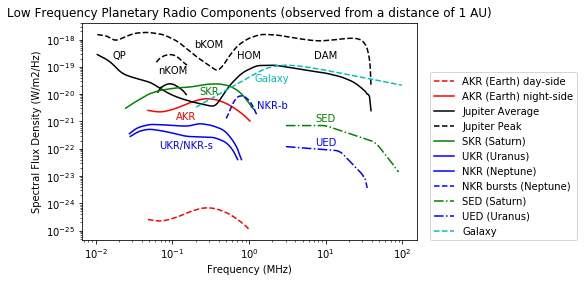

In [9]:
for k, cur_style in plot_config.items():
    f, s, m = data[k]
    plt.loglog(f.value, s.value*DISTANCES[m['target_name'].lower()]**2, cur_style[1], label=cur_style[0])
plt.loglog(gal_freqs.to('MHz').value, gal_spect.to('W m^-2 Hz^-1'), '--c', label='Galaxy')
plt.text(0.02, 2e-19, 'QP', ha='center')
plt.text(0.1, 6e-20, 'nKOM', ha='center')
plt.text(0.3, 5e-19, 'bKOM', ha='center')
plt.text(1, 2e-19, 'HOM', ha='center')
plt.text(10, 2e-19, 'DAM', ha='center')
plt.text(0.3, 1e-20, 'SKR', ha='center', c='g')
plt.text(0.15, 1.2e-21, 'AKR', ha='center', c='r')
plt.text(10, 1e-21, 'SED', ha='center', c='g')
plt.text(10, 1.3e-22, 'UED', ha='center', c='b')
plt.text(2, 3e-20, 'Galaxy', ha='center', c='c')
plt.text(0.15, 1e-22, 'UKR/NKR-s', ha='center', c='b')
plt.text(2, 3e-21, 'NKR-b', ha='center', c='b')
plt.xlabel("Frequency (MHz)")
plt.ylabel("Spectral Flux Density (W/m2/Hz)")
plt.title("Low Frequency Planetary Radio Components (observed from a distance of 1 AU)")
plt.legend(loc=(1.04,0))



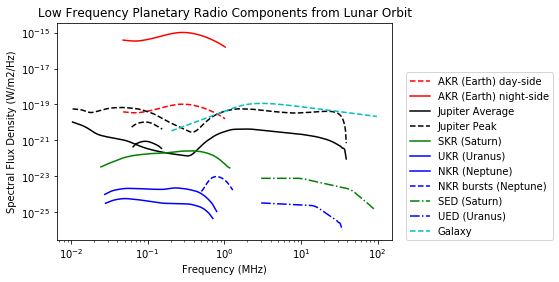

In [10]:
# in Lunar orbit

for k, cur_style in plot_config.items():
    f, s, m = data[k]
    plt.loglog(f.value, s.value, cur_style[1], label=cur_style[0])
plt.loglog(gal_freqs.to('MHz').value, gal_spect.to('W m^-2 Hz^-1'), '--c', label='Galaxy')

plt.ylabel("Spectral Flux Density (W/m2/Hz)")
plt.xlabel("Frequency (MHz)")
plt.title('Low Frequency Planetary Radio Components from Lunar Orbit')
plt.legend(loc=(1.04,0))


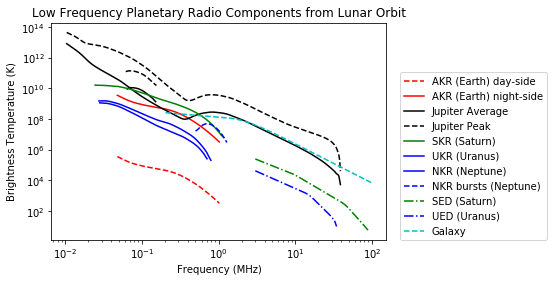

In [11]:
# in Lunar orbit + brightness temperature
from models import jansky_to_kelvin

for k, cur_style in plot_config.items():
    f, s, m = data[k]
    plt.loglog(f.value, jansky_to_kelvin(f, s.value*DISTANCES[m['target_name'].lower()]**2), cur_style[1], label=cur_style[0])

plt.loglog(gal_freqs.to('MHz').value, jansky_to_kelvin(gal_freqs, gal_spect), '--c', label='Galaxy')
plt.ylabel("Brightness Temperature (K)")
plt.xlabel("Frequency (MHz)")
plt.title('Low Frequency Planetary Radio Components from Lunar Orbit')
plt.legend(loc=(1.04,0))
